In [1]:
from dask import array, dataframe, bag

### Fun with arrays

In [80]:
da = array.random.binomial(100, .3, 1000, chunks=(100))

In [81]:
da.size

1000

In [82]:
da[:20]

dask.array<getitem..., shape=(20,), dtype=int64, chunksize=(20,)>

In [83]:
da[:20].compute()

array([35, 32, 22, 36, 44, 33, 23, 34, 33, 30, 26, 35, 32, 30, 31, 20, 28,
       32, 27, 31])

In [84]:
da.npartitions

10

In [87]:
da[:300].chunks

((100, 100, 100),)

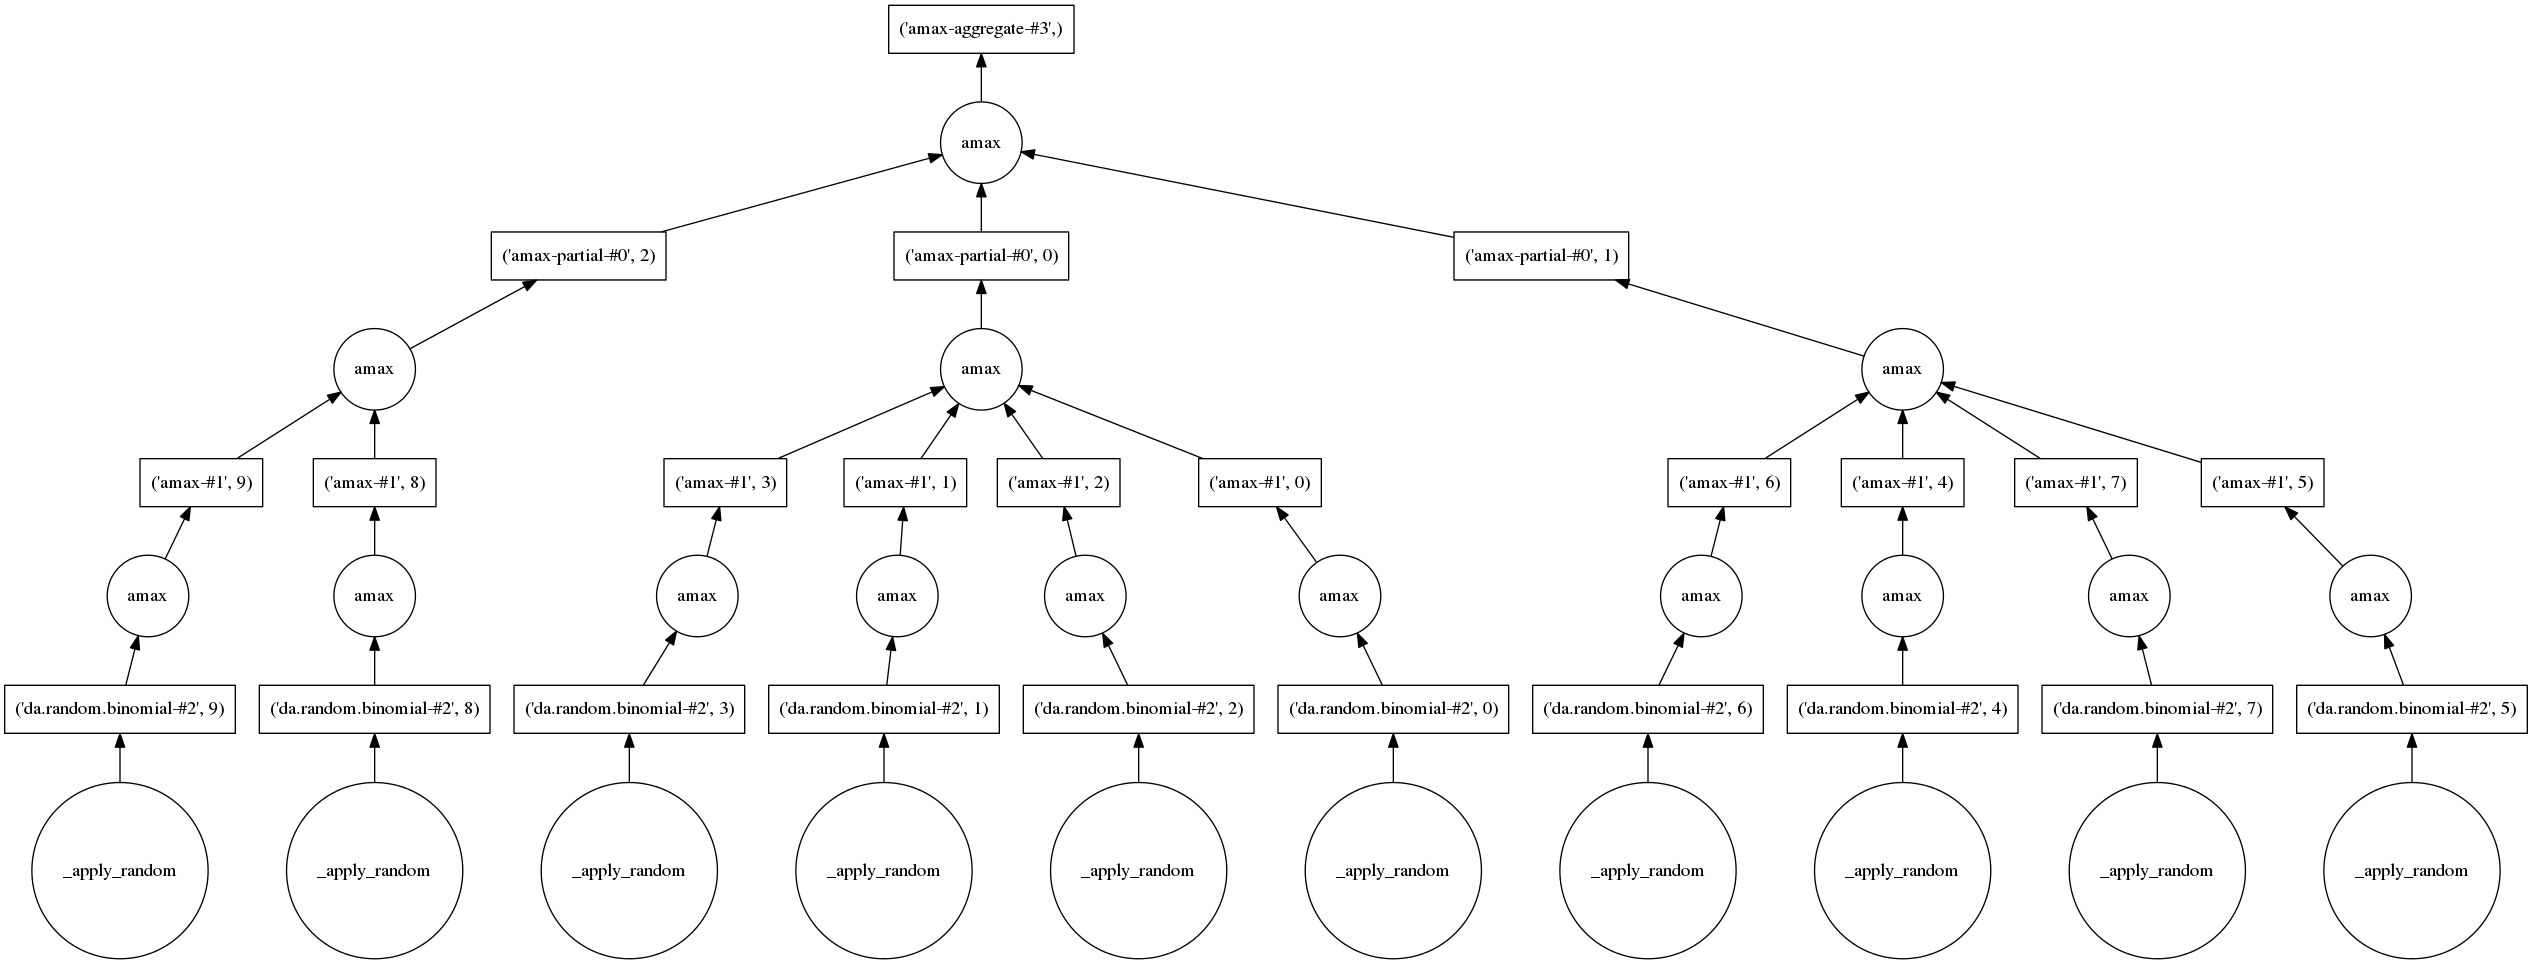

In [88]:
da.max().visualize()

In [89]:
da.max()

dask.array<amax-ag..., shape=(), dtype=int64, chunksize=()>

In [90]:
da.max().compute()

47

### Working with dataframes

In [331]:
df = dataframe.read_csv('/home/katharine/Downloads/datasets/mvt_cleaned.csv')

In [332]:
df.head()

,Date,Latitude,Longitude,DateTime,Hour,DayOfWeek
0,2012-12-31,41.756284,-87.621645,2012-12-31 23:15:00,23.0,0.0
1,2012-12-31,41.898788,-87.661303,2012-12-31 22:00:00,22.0,0.0
2,2012-12-31,41.969186,-87.767670,2012-12-31 22:00:00,22.0,0.0
3,2012-12-31,41.769329,-87.657726,2012-12-31 22:00:00,22.0,0.0
4,2012-12-31,41.837568,-87.621761,2012-12-31 21:30:00,21.0,0.0


In [296]:
df.dtypes

Date          object
Latitude     float64
Longitude    float64
DateTime      object
Hour         float64
DayOfWeek    float64
dtype: object

In [333]:
df2 = df.set_index('DateTime', sorted=True)

In [336]:
df2.divisions

('2001-01-01 00:01:00', '2012-12-31 23:15:00')

In [337]:
dates = [str(datetime(x, 1, 1)) for x in range(2001, 2013)]

In [338]:
dates

['2001-01-01 00:00:00',
 '2002-01-01 00:00:00',
 '2003-01-01 00:00:00',
 '2004-01-01 00:00:00',
 '2005-01-01 00:00:00',
 '2006-01-01 00:00:00',
 '2007-01-01 00:00:00',
 '2008-01-01 00:00:00',
 '2009-01-01 00:00:00',
 '2010-01-01 00:00:00',
 '2011-01-01 00:00:00',
 '2012-01-01 00:00:00']

In [339]:
df3 = df.set_partition('DateTime', divisions=dates)

In [340]:
df3.divisions

('2001-01-01 00:00:00',
 '2002-01-01 00:00:00',
 '2003-01-01 00:00:00',
 '2004-01-01 00:00:00',
 '2005-01-01 00:00:00',
 '2006-01-01 00:00:00',
 '2007-01-01 00:00:00',
 '2008-01-01 00:00:00',
 '2009-01-01 00:00:00',
 '2010-01-01 00:00:00',
 '2011-01-01 00:00:00',
 '2012-01-01 00:00:00')

In [341]:
len(df2)

191641

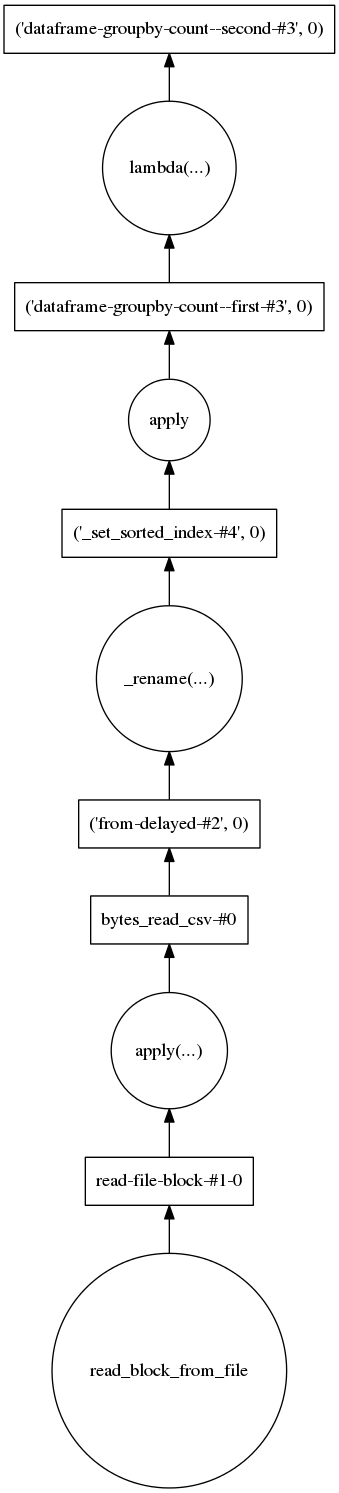

In [342]:
df2.groupby('DayOfWeek').count().visualize()

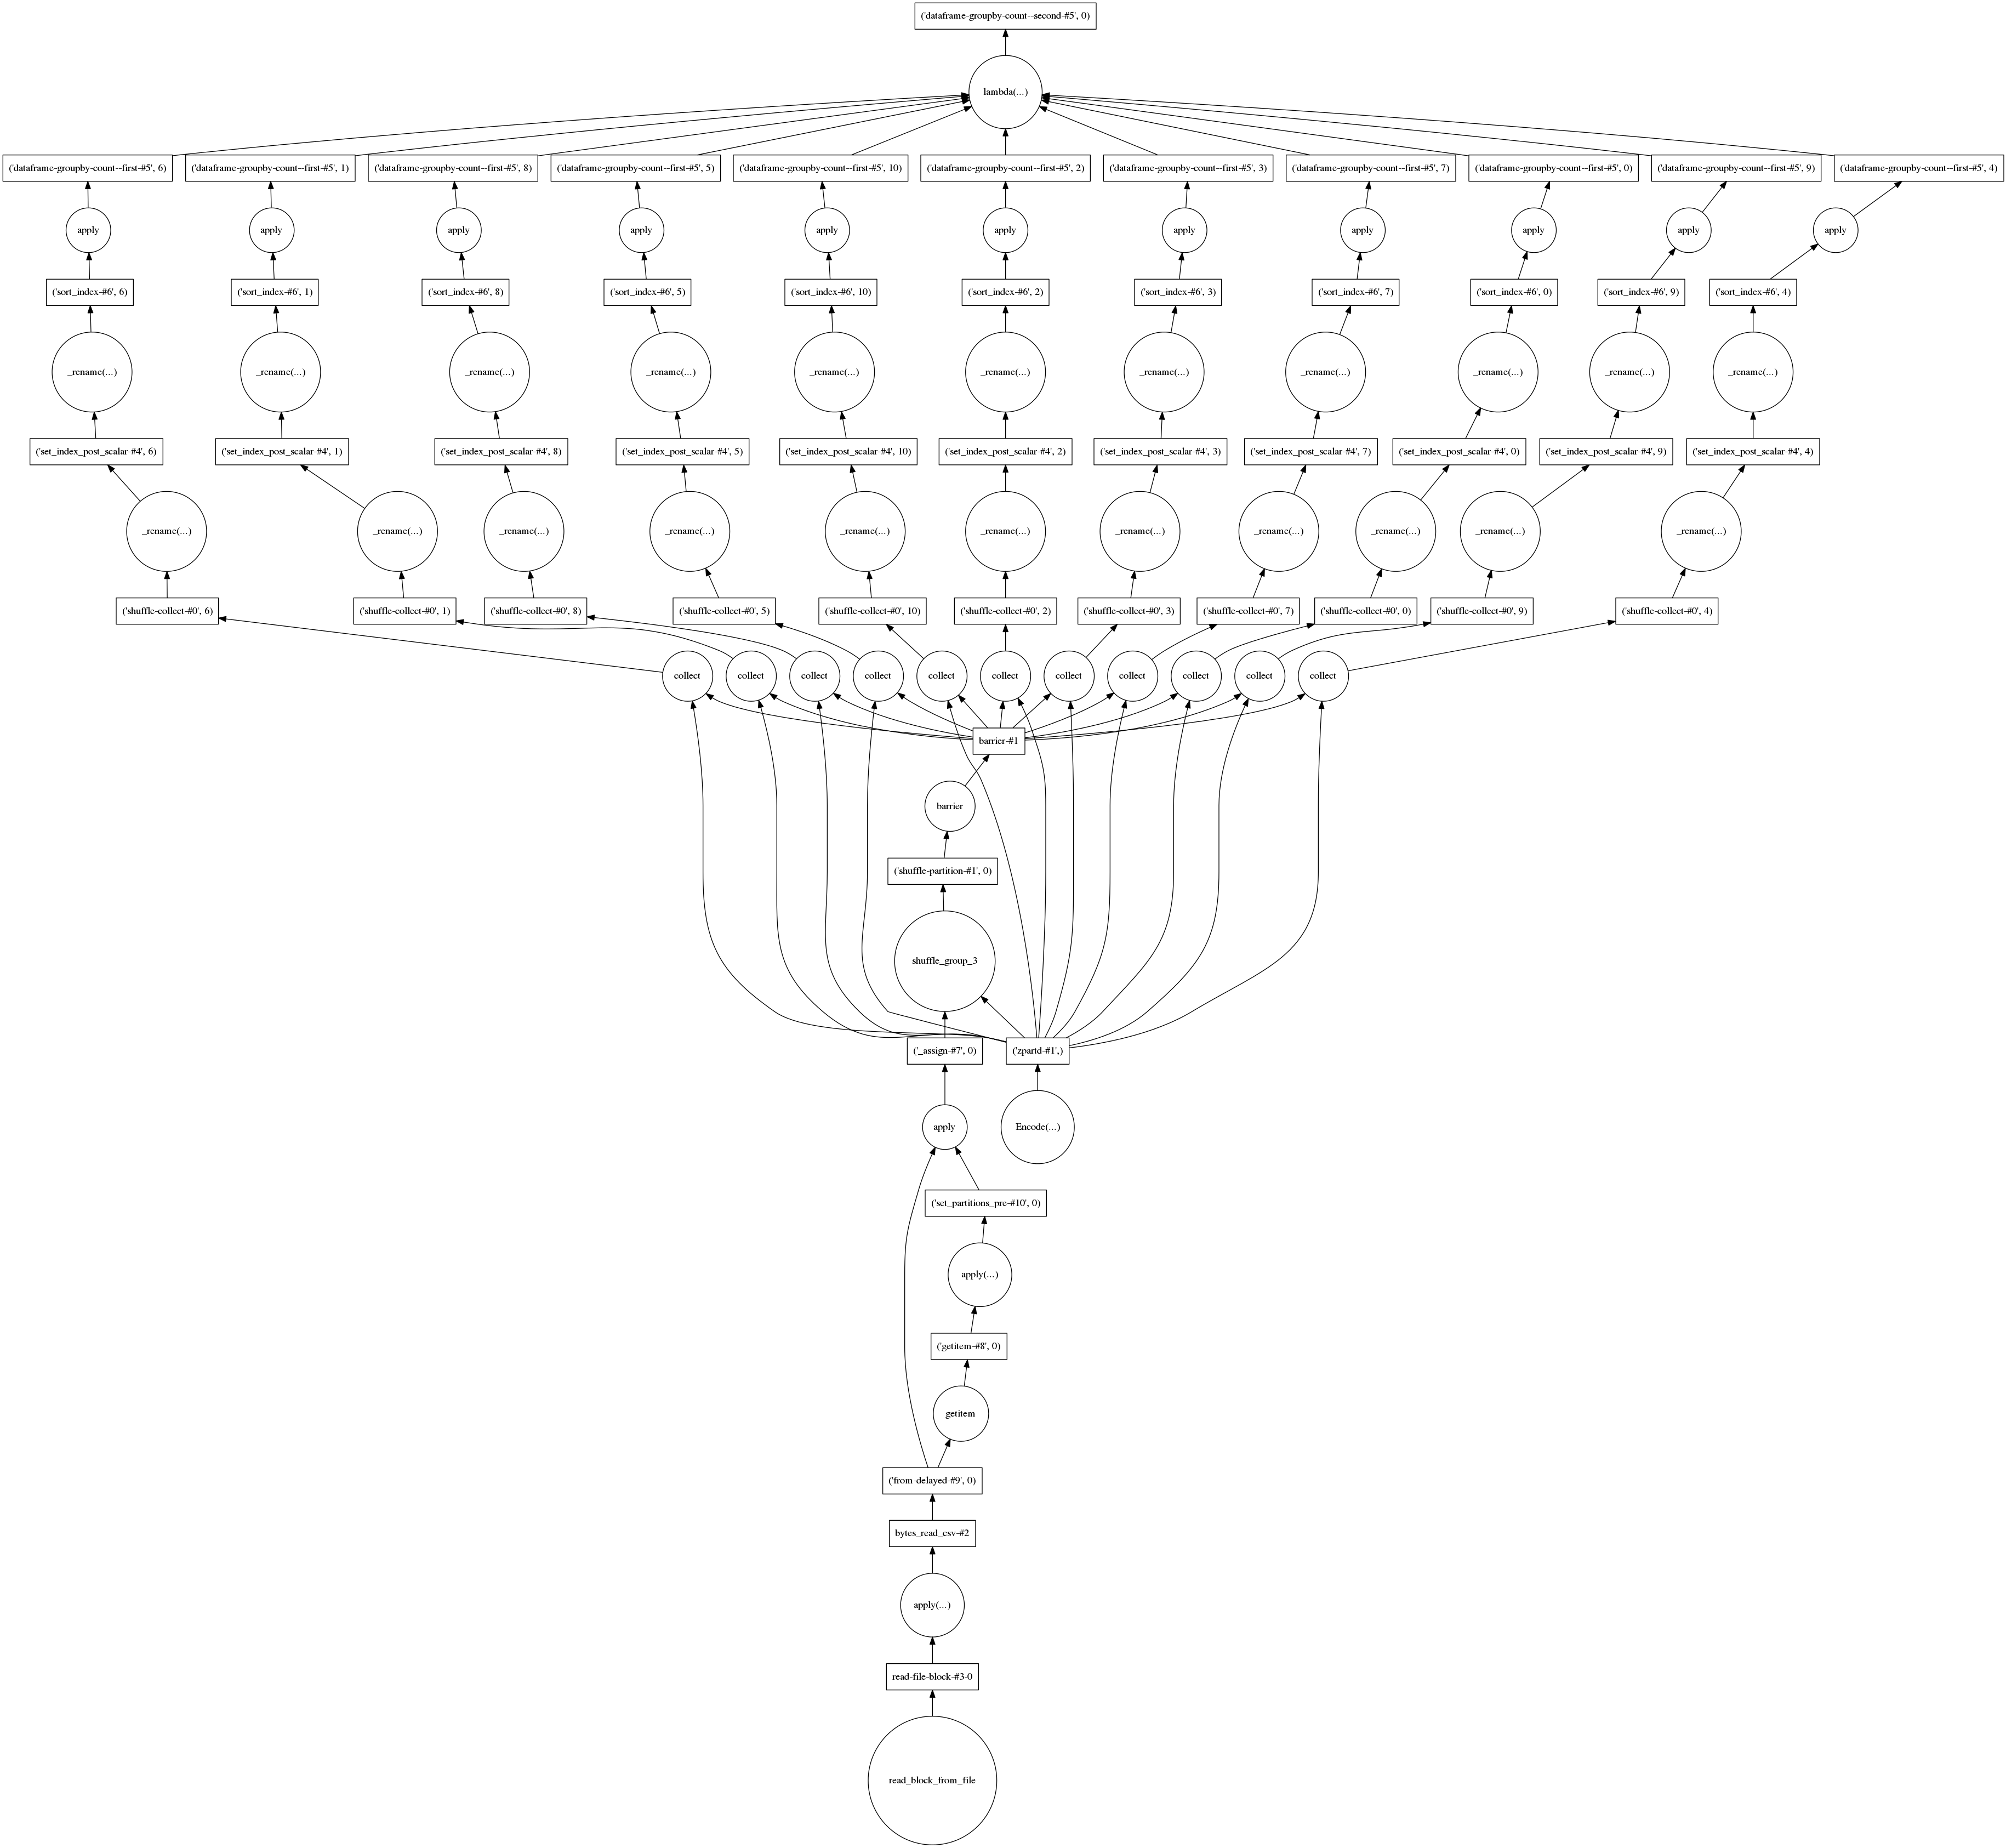

In [345]:
df3.groupby('DayOfWeek').count().visualize()

In [343]:
df2.groupby('DayOfWeek').Hour.count().compute()

DayOfWeek
0.0    27397
1.0    26791
2.0    27416
3.0    27319
4.0    29284
5.0    27118
6.0    26316
Name: Hour, dtype: int64

In [344]:
df2.Hour.astype(int).value_counts().compute()

22    14745
0     13212
21    12434
20    11716
23    11293
18    10521
19    10427
17     8635
12     8158
9      8136
8      7866
16     7736
15     7512
7      6852
1      6643
10     6566
14     6419
13     5555
11     5415
2      5377
6      5136
3      4202
5      3728
4      3357
Name: Hour, dtype: int64

In [349]:
## Generator for larger timeseries dataframes, courtesy of dask-examples repo: 
## https://github.com/dask/dask-examples
## This will generate one file per year. 


import pandas as pd
import numpy as np
for year in range(1980, 2005):
    idx = pd.date_range(str(year), str(year + 1), freq='d', closed='left')
    pd.DataFrame({'A': np.random.randn(len(idx)), 
                  'B': np.random.randint(len(idx))},
                 index=idx).to_csv('data/fake_data_{0}.csv'.format(year), index_label='date')

In [350]:
bigger_df = dataframe.read_csv('data/fake_data_*.csv').set_index('date')

In [351]:
bigger_df.divisions

('1980-01-01',
 '1980-12-26',
 '1981-12-15',
 '1982-12-14',
 '1983-12-31',
 '1984-12-13',
 '1985-12-13',
 '1986-12-13',
 '1987-12-31',
 '1988-12-27',
 '1989-12-13',
 '1990-12-31',
 '1991-12-31',
 '1992-12-29',
 '1993-12-13',
 '1994-12-31',
 '1995-12-31',
 '1996-12-13',
 '1997-12-31',
 '1998-12-31',
 '1999-12-31',
 '2000-12-13',
 '2001-12-31',
 '2002-12-31',
 '2003-12-31',
 '2004-12-31')